In [145]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import SVHN
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
from scipy.io import loadmat
from torchvision import datasets
from torch.nn import functional as F
from torchvision import transforms
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
from torchvision.datasets import ImageFolder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,accuracy_score,f1_score, classification_report
from torchvision.io import read_image
from PIL import Image, ImageDraw, ImageFilter

In [126]:
dataset_train = datasets.ImageFolder('./train')
dataset_test = datasets.ImageFolder('./test')


In [127]:
len(dataset_train),len(dataset_test)

(1025, 100)

In [128]:
train_transformations = transforms.Compose([
 transforms.RandomVerticalFlip(),
 transforms.RandomHorizontalFlip(),
 transforms.RandomRotation(10),
 transforms.Resize((32,32)), #resize input images to 255,255
 transforms.ToTensor(),
 transforms.Normalize([0.456, 0.456, 0.456], [0.225, 0.225, 0.225])])

test_transformations = transforms.Compose([
 transforms.Resize((32,32)), #resize input images to 255,255
 transforms.ToTensor(),
 transforms.Normalize([0.456, 0.456, 0.456], [0.225, 0.225, 0.225])])
    
    
training_dataset = ImageFolder('./train', transform=train_transformations)
testing_dataset= ImageFolder('./test', transform=test_transformations)

In [129]:
for images, labels in dataset_train:
 print(labels)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [130]:
#splitting training dataset into train_ds and val_ds
random_seed = 42
torch.manual_seed(random_seed);
val_size = 100
train_size = len(training_dataset) - val_size
train_ds, val_ds = random_split(training_dataset, [train_size, val_size])
len(train_ds), len(val_ds)


(925, 100)

In [131]:
train_dl = torch.utils.data.DataLoader(training_dataset, batch_size = 55, shuffle=True, num_workers=4, pin_memory=True)
test_dl = torch.utils.data.DataLoader(testing_dataset, batch_size =55 ,shuffle =True, num_workers=4, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 3, 0, 2, 2, 1, 3, 0, 1, 2, 2, 1,
        1, 3, 2, 2, 3, 1, 1, 2, 3, 2, 1, 0, 1, 0, 3, 2, 3, 3, 1, 0, 3, 3, 1, 3,
        0, 0, 2, 0, 0, 2, 1])


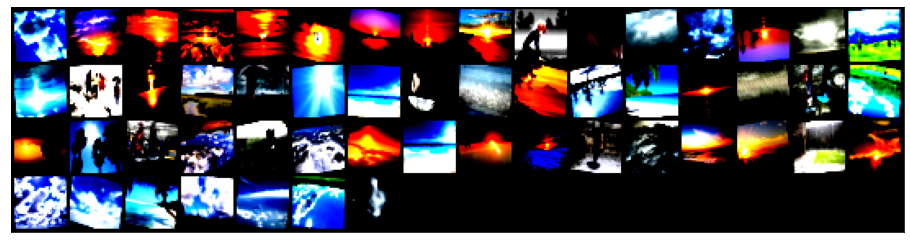

In [132]:
batch_size = 55
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
#We can look at batches of images from the dataset using the `make_grid` method f
from torchvision.utils import make_grid
def show_batch(dl):
    for images, labels in dl:
        print(labels)
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break
show_batch(train_dl)

In [133]:
train_dl,test_dl,val_dl

(<torch.utils.data.dataloader.DataLoader at 0x21b36858df0>,
 <torch.utils.data.dataloader.DataLoader at 0x21b42d9c670>)

In [134]:
model_two_layers = nn.Sequential(
    nn.Linear(3072, 1750),
    nn.ReLU(),
    nn.Linear(1750, 500),
    nn.ReLU(),
    nn.Linear(500, 250),
    nn.ReLU(),
    nn.Linear(250, 4),
    nn.LogSoftmax(dim=1)
)

In [138]:
loss_fn = nn.CrossEntropyLoss()

# svhn2 = [(img, label) for img, label in train_dl]
# svhn2_val = [(img, label) for img, label in test_dl]
# train_loader = torch.utils.data.DataLoader(svhn2, batch_size = 1000, shuffle = True)
# test_loader = torch.utils.data.DataLoader(svhn2_val, batch_size = 1000, shuffle = True)

model = model_two_layers
learning_rate = 1e-2 # 0.001
n_epochs = 10
optimizer = optim.SGD( model.parameters(), lr=learning_rate)



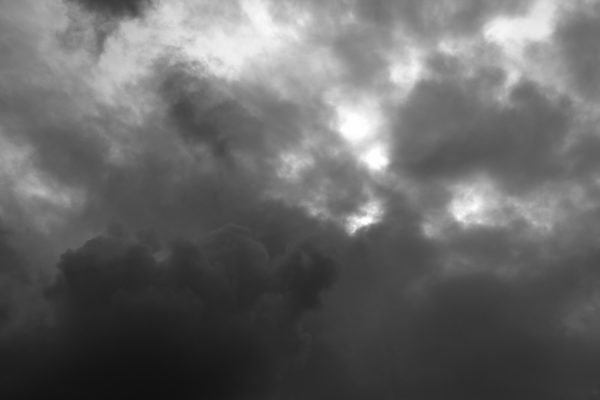

In [139]:
# import Image
original_img = Image.open('./train/cloudy/cloudy1.jpg')
original_img

In [164]:
[]


for epoch in range(n_epochs):
    for imgs, labels in train_dl:
        batch_size = imgs.shape[0]
        imgs_resized = imgs.view(batch_size, -1)
        outputs = model(imgs_resized)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
   
  # print("Epoch:", i+1)
    print(loss)


tensor(0.0351, grad_fn=<NllLossBackward0>)
tensor(0.0127, grad_fn=<NllLossBackward0>)
tensor(0.0614, grad_fn=<NllLossBackward0>)
tensor(0.0152, grad_fn=<NllLossBackward0>)
tensor(0.0371, grad_fn=<NllLossBackward0>)
tensor(0.0281, grad_fn=<NllLossBackward0>)
tensor(0.1441, grad_fn=<NllLossBackward0>)
tensor(0.0062, grad_fn=<NllLossBackward0>)
tensor(0.0505, grad_fn=<NllLossBackward0>)
tensor(0.0148, grad_fn=<NllLossBackward0>)


In [141]:
temp_metric = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_dl:
        batch_size = imgs.shape[0]
        outputs = model( imgs.view(batch_size, -1) )
        _, pred = torch.max( outputs, dim=1 )
        temp_metric = temp_metric + int( (pred == labels).sum() )
        total = total + batch_size
print( temp_metric/total )

0.98


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: sunrise


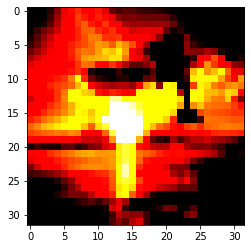

In [142]:
img, label = testing_dataset[76]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label])

In [153]:
import seaborn as sns
def print_stats_percentage_train_test(algorithm_name, y_test, y_pred):
    print("------------------------------------------------------")
    print("------------------------------------------------------")

    print("algorithm is: ", algorithm_name)

    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred) )

    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(confmat, annot=True, cmap='Greens', fmt='d', ax=ax)
    plt.show()
    print("confusion matrix")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print("Classification report:")
    print(classification_report(y_true=y_test, y_pred=y_pred))

------------------------------------------------------
------------------------------------------------------
algorithm is:  Two layers
Accuracy: 0.98


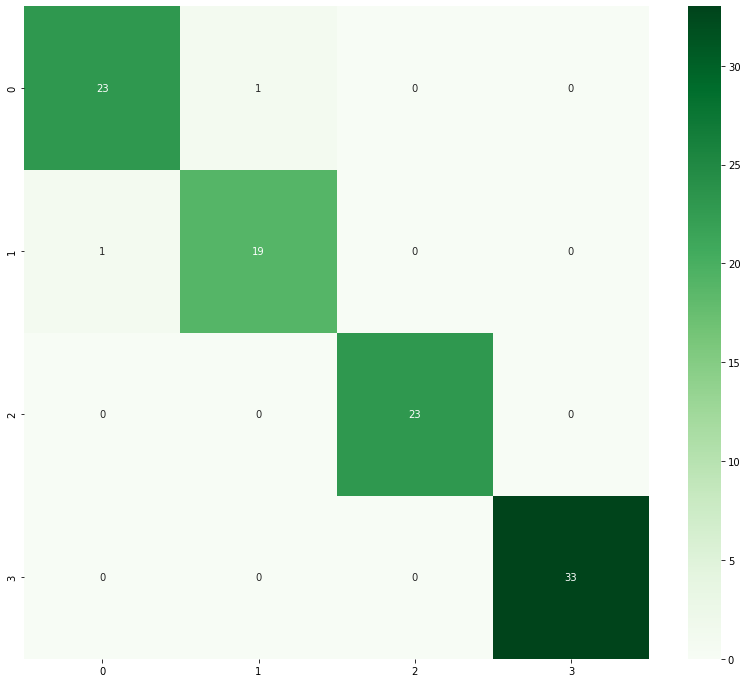

confusion matrix
[[23  1  0  0]
 [ 1 19  0  0]
 [ 0  0 23  0]
 [ 0  0  0 33]]
Precision: 0.980
Recall: 0.980
F1-measure: 0.980
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.95      0.95      0.95        20
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        33

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [154]:
print_stats_percentage_train_test("Two layers", labels, pred)

## Adverseraial Images

In [116]:
from torchvision.io import read_image
from PIL import Image, ImageDraw, ImageFilter

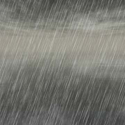

In [117]:
image_rain = Image.open('./train/rain/rain1.jpg')

image_rain = image_rain.resize((125,125))
image_rain

In [118]:
import glob
import os
files = glob.glob ("./train/sunrise/*.jpg")
target_dir = './train1/sunrise/'
                   
c = 357
for myFile in files:
    if c<458:
        my_im = Image.open(myFile)
        #my_im.show()
#         resized_my_im = my_im.resize((28,2)) ## resize from 100x100x3 to 28x
#         #resized_my_im.show()


        my_im.paste(image_rain)
#         my_im.show()


        filepath = os.path.join(target_dir, f"sunrise{c}.jpg")
        my_im.save(filepath)



#         #print(resized_my_im)
#         #resized_my_im.show()
        c=c+1

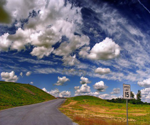

In [119]:
image_cloudy = Image.open('./train/cloudy/cloudy142.jpg')

image_cloudy = image_cloudy.resize((150,125))
image_cloudy

In [120]:
import glob
import os
files = glob.glob ("./train/sunrise/*.jpg")
target_dir = './train1/sunrise/'
                   
c = 458
for myFile in files:
    if c<559:
        my_im = Image.open(myFile)
        #my_im.show()
#         resized_my_im = my_im.resize((28,2)) ## resize from 100x100x3 to 28x
#         #resized_my_im.show()


        my_im.paste(image_cloudy)
#         my_im.show()


        filepath = os.path.join(target_dir, f"sunrise{c}.jpg")
        my_im.save(filepath)



#         #print(resized_my_im)
#         #resized_my_im.show()
        c=c+1

In [ ]:
image_shine = Image.open('./train/shine/shine149.jpg')

image_shine = image_shine.resize((150,125))
image_shine

In [ ]:
import glob
import os
files = glob.glob ("./train1/cloudy/*.jpg")
target_dir = './train1/sunrise/'
                   
c = 559
for myFile in files:
    if c<660:
        my_im = Image.open(myFile)
        #my_im.show()
#         resized_my_im = my_im.resize((28,2)) ## resize from 100x100x3 to 28x
#         #resized_my_im.show()


        my_im.paste(image_shine)
#         my_im.show()


        filepath = os.path.join(target_dir, f"sunrise{c}.jpg")
        my_im.save(filepath)



#         #print(resized_my_im)
#         #resized_my_im.show()
        c=c+1